# [ 월별 CPI와 취급액의 상관관계 분석]

In [1]:
import pandas as pd
import numpy as np

In [57]:
pf = pd.read_excel('performance.xlsx', header=1)
cpi = pd.read_excel('CPI.xlsx', header=0)

# 1. 데이터 전처리

In [13]:
cpi_series = cpi.iloc[1]
cpi_dict = cpi_series.to_dict()
del cpi_dict['시도별']
del cpi_dict['품목별']
cpi_dict

{'2019. 01': 104.03,
 '2019. 02': 104.61,
 '2019. 03': 104.45,
 '2019. 04': 104.81,
 '2019. 05': 105.29,
 '2019. 06': 105.19,
 '2019. 07': 104.4,
 '2019. 08': 104.73,
 '2019. 09': 105.57,
 '2019. 10': 105.96,
 '2019. 11': 105.37,
 '2019. 12': 105.51,
 '2020. 01': 106.26}

In [14]:
pf

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
...,...,...,...,...,...,...,...,...
38304,2020-01-01 00:20:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38305,2020-01-01 00:40:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38306,2020-01-01 01:00:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38307,2020-01-01 01:20:00,20.000000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN


In [58]:
pf['year'] = pf['방송일시'].map(lambda x: x.year)
pf['month'] = pf['방송일시'].map(lambda x: x.month)
pf['day'] = pf['방송일시'].map(lambda x: x.day)
pf['time'] = pf['방송일시'].map(lambda x: x.time())

In [59]:
pf = pf[['year', 'month', '취급액']]
pf = pf.dropna()
pf = pf[pf.취급액 != 50000]
pf

,year,month,취급액
0,2019,1,2099000.0
1,2019,1,4371000.0
2,2019,1,3262000.0
3,2019,1,6955000.0
4,2019,1,6672000.0
...,...,...,...
38299,2019,12,10157000.0
38300,2020,1,50929000.0
38301,2020,1,104392000.0
38302,2020,1,13765000.0


In [60]:
def make_date(year, month):
    date = str(int(year))+'. ' 
    month = str(int(month))
    if len(month) == 1:
        month = '0' + month
    date = date + month
    return date    

In [61]:
pf['date'] = pf.apply(lambda x: make_date(x['year'], x['month']), axis=1)
pf = pf.groupby('date').sum()
pf

,year,month,취급액
date,,,
2019. 01,5574459,2761,6.870581e+10
2019. 02,5398806,5348,5.958138e+10
2019. 03,6204387,9219,6.462860e+10
2019. 04,6323508,12528,6.077887e+10
2019. 05,6622320,16400,6.890008e+10
2019. 06,5774340,17160,6.633750e+10
2019. 07,6323508,21924,6.901510e+10
2019. 08,5859138,23216,6.901195e+10
2019. 09,6020658,26838,6.746911e+10


In [63]:
pf['cpi'] = cpi_dict.values()
pf

,year,month,취급액,cpi
date,,,,
2019. 01,5574459,2761,6.870581e+10,104.03
2019. 02,5398806,5348,5.958138e+10,104.61
2019. 03,6204387,9219,6.462860e+10,104.45
2019. 04,6323508,12528,6.077887e+10,104.81
2019. 05,6622320,16400,6.890008e+10,105.29
2019. 06,5774340,17160,6.633750e+10,105.19
2019. 07,6323508,21924,6.901510e+10,104.40
2019. 08,5859138,23216,6.901195e+10,104.73
2019. 09,6020658,26838,6.746911e+10,105.57


In [68]:
cp = pf[['취급액', 'cpi']]
cp.columns = ['profit', 'cpi']
cp = cp.iloc[:-1]
cp

,profit,cpi
date,,
2019. 01,6.870581e+10,104.03
2019. 02,5.958138e+10,104.61
2019. 03,6.462860e+10,104.45
2019. 04,6.077887e+10,104.81
2019. 05,6.890008e+10,105.29
2019. 06,6.633750e+10,105.19
2019. 07,6.901510e+10,104.40
2019. 08,6.901195e+10,104.73
2019. 09,6.746911e+10,105.57


# 2. 상관관계 분석

## (1) 산점도

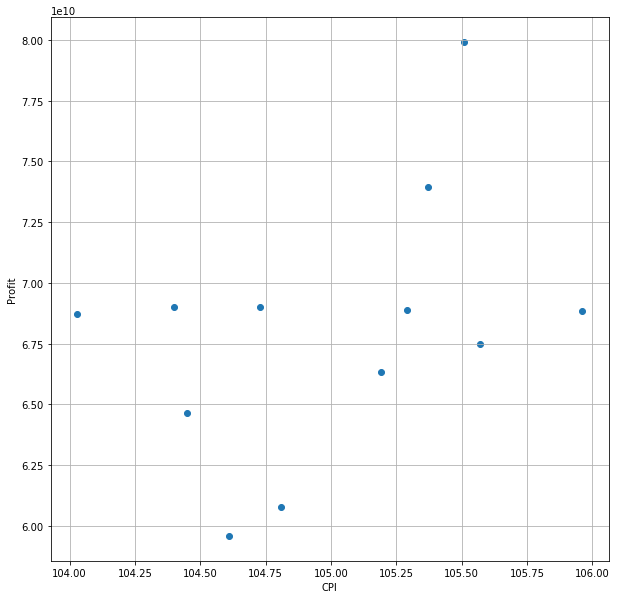

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

# 산점도 작성
plt.figure(figsize=(10, 10))         # 플롯 사이즈 지정
plt.scatter(cp.cpi, cp.profit)       # 산점도
plt.xlabel("CPI")                    # x축 레이블 지정
plt.ylabel("Profit")                 # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.show()                           # 플롯 보이기

## (2) pair plot

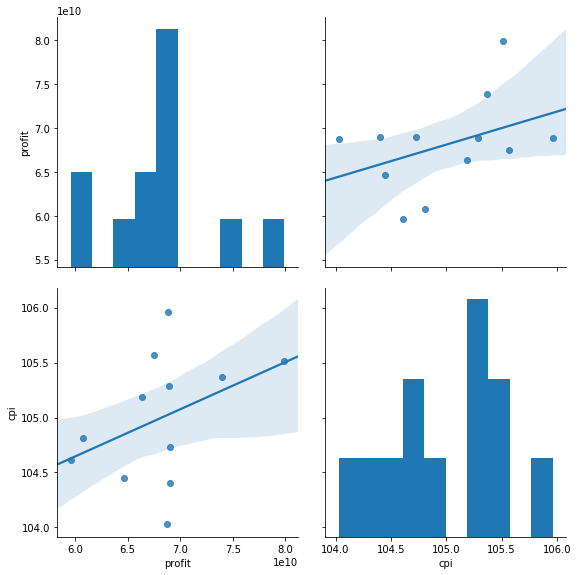

In [70]:
import seaborn as sns

sns.pairplot(cp, kind='reg', height=4)    # 페어플롯 작성

## (3)피어슨 상관계수

In [73]:
import scipy.stats as stats

# 피어슨 상관계수 검정
corr = stats.pearsonr(cp.cpi, cp.profit)
corr

(0.40225253605081945, 0.19486928269263348)

p-value가 20% 가까이 되므로 cpi와 profit이 독립이라는 귀무가설을 기각하기 어렵다.